# 1. Install, Imports, Settings

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

# 2. Load data

In [3]:
df = pd.read_csv("data/alertas_NNAJ_keywords.csv", sep="|")
print("Total Number of documents:", len(df))
print("Number of documents with no accesible text (pass protected):", len(df[df['Text'].isnull()]))
print("Number of documents with accesible text:",  len(df[df['Text'].notnull()]))
print("Number of documents mentioning NNAJ:",  len(df[df['NNAJ'] != "[]"]))

Total Number of documents: 1753
Number of documents with no accesible text (pass protected): 5
Number of documents with accesible text: 1748
Number of documents mentioning NNAJ: 1140


In [4]:
df.drop(['NNAJ_clean_text', 'NNAJ_keywords', 'NNAJ_keywords2','NNAJ_keywords3'], axis = 1).head()

,Filename,Text,Subtype,Type,Year,Path,Departamento,NNAJ
0,"AT N° 003-18 NAR-Cumbitara, Maguí Payán, Polic...","Defensoria del Pueblo COLOMB IA Bogotá D.C., 5...",Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 003-18 NAR-...,Nariño,['Por lo anterior; desde el Sistema de Alertas...
1,AT N° 004-18 NAR-Tumaco.pdf,Defensoría del Pueblo CO LO Mll.t. Carrera 9 #...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 004-18 NAR-...,Nariño,"['Los territorios dejados por las FARC - EP, f..."
2,AT N° 005-18 COR-Tierralta.pdf,Carrera 9 # 16 -21 Bogotá D.C. PBX: (57) (1) 3...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 005-18 COR-...,Córdoba,"['En ese sentido, la población civil se encuen..."
3,AT N° 006-18 ARA-Saravena.pdf,Defensoría del Pueblo Carrera 9 # 16-21 Bogotá...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 006-18 ARA-...,Arauca,['También se advierte· el riesgo de secuestros...
4,"AT N° 007-18 MET-Puerto Lleras, Puerto Rico y ...",San Vicente Bajo l' Margen Izquierda del río G...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 007-18 MET-...,Meta,['Integrantes del Nuev o Partido FAR( **niños*...


# 3. Number of Documents by Type and Subtype

In [5]:
df.groupby(["Type", "Subtype"]).agg({"Filename":"count"})

Filename
Type        Subtype                         
Advertencia Alerta Temprana              378
            Informe de Riesgo            681
            Notas                        558
Seguimiento Informe de Seguimiento       136

In [6]:
len(df[df.Subtype == "Not Identified"])

0

# 4. Number of Documents Mentioning NNAJ by Type and Subtype

In [7]:
df = df[df['NNAJ'] != "[]"]
df.groupby(["Type", "Subtype"]).agg({"Filename":"count"})

Filename
Type        Subtype                         
Advertencia Alerta Temprana              243
            Informe de Riesgo            445
            Notas                        336
Seguimiento Informe de Seguimiento       116

# 4.1 Timeline of NNAJ documents compared to total of Docs.  

In [142]:
dftotal = pd.read_csv("data/alertas_NNAJ_keywords.csv", sep="|")
dftotal  = dftotal.groupby('Year').agg({'Filename': 'count'})
dfyears  = df.groupby('Year').agg({'Filename': 'count'})
dftotal.columns = ['Total of Documents']
dfyears.columns = ['Documents mentioning NNAJ']

In [143]:
dftotal.head()

,Total of Documents
Year,
2001,71
2002,131
2003,166
2004,153
2005,96


In [144]:
dfyears.head()

,Documents mentioning NNAJ
Year,
2001,1
2002,30
2003,46
2004,57
2005,48


In [145]:
len(dfyears), len(dftotal)

(22, 22)

In [146]:
dfmerge = pd.concat([ dftotal, dfyears], axis=1)
dfmerge

,Total of Documents,Documents mentioning NNAJ
Year,,
2001,71,1
2002,131,30
2003,166,46
2004,153,57
2005,96,48
2006,90,51
2007,90,51
2008,71,54
2009,66,59


<Figure size 720x432 with 0 Axes>

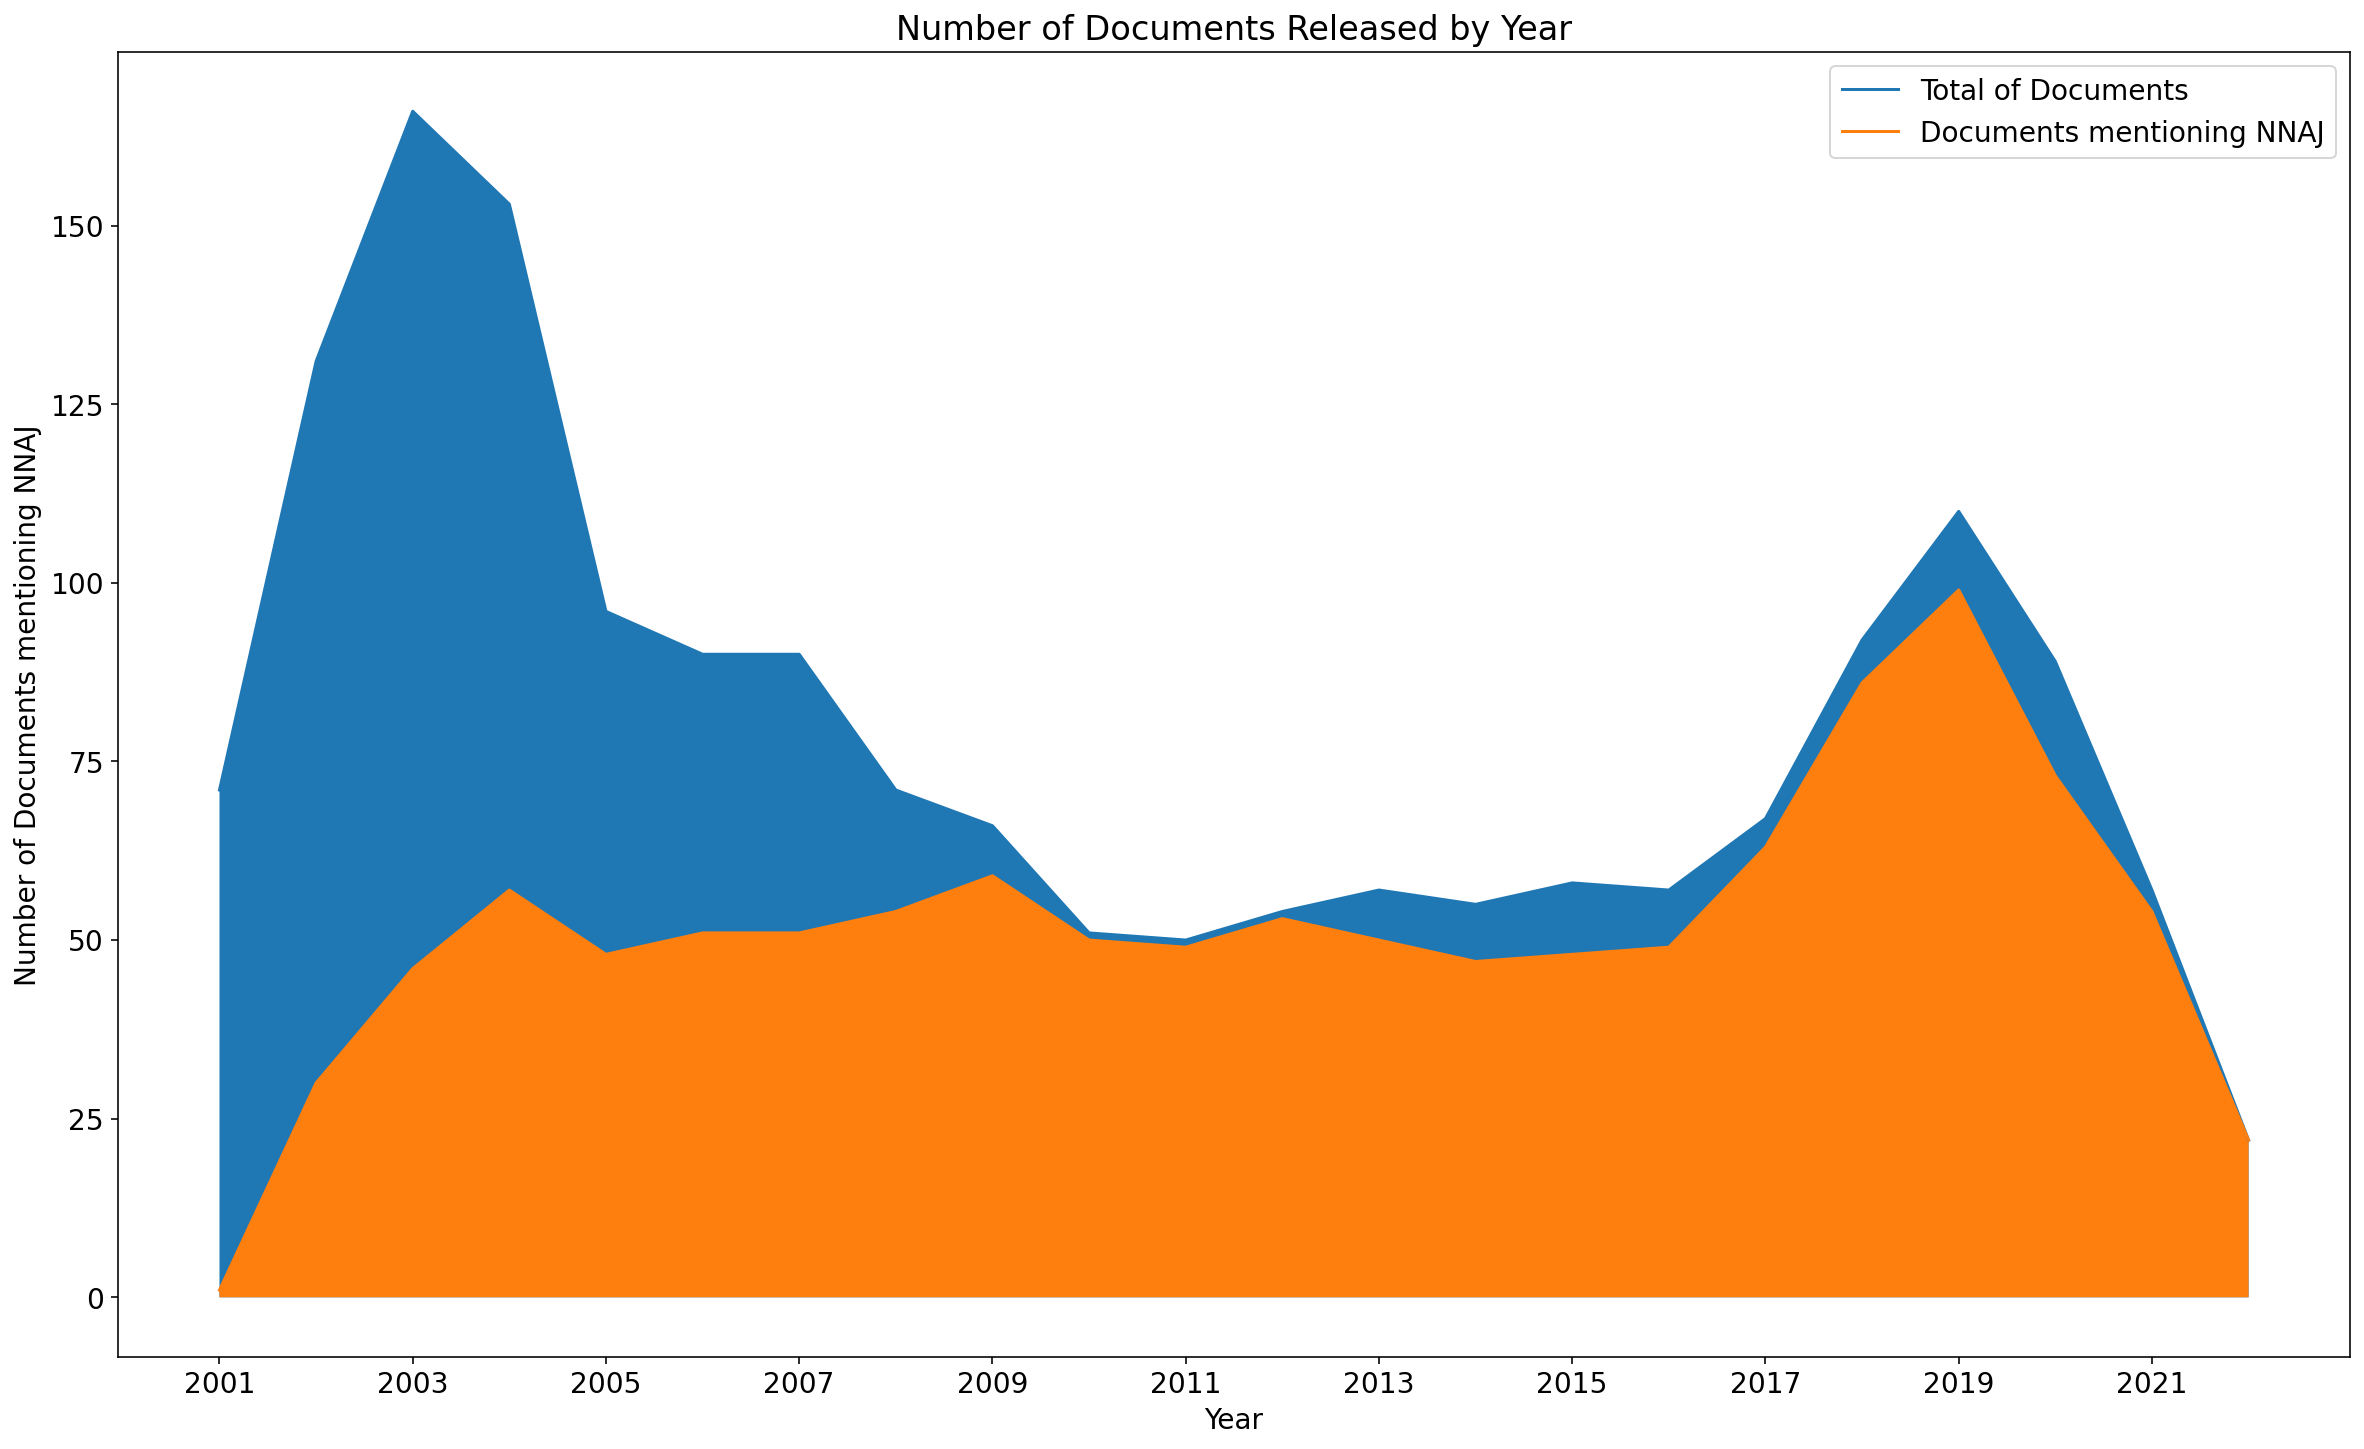

In [164]:
plt.figure()
plt.rcParams.update({'font.size': 14})

ax = dfmerge.plot(figsize=(20, 12))
plt.title("Number of Documents Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Documents mentioning NNAJ")

plt.fill_between(dfmerge.index, dfmerge['Total of Documents'])
plt.fill_between(dfmerge.index, dfmerge['Documents mentioning NNAJ'])
plt.xticks(np.arange(2001,2022,2));

# 4.2 Statistical Distribution by SubType

In [148]:
df.groupby(["Type", "Subtype"]).agg({"Filename":"count"}).describe()

,Filename
count,4.000000
mean,285.000000
std,139.673429
min,116.000000
25%,211.250000
50%,289.500000
75%,363.250000
max,445.000000


# 4.3 Number of documents by Year

In [149]:
df.groupby(["Type", "Subtype", "Year"]).agg({"Filename":"count"})

Filename
Type        Subtype                Year          
Advertencia Alerta Temprana        2001         1
                                   2002        23
                                   2017         1
                                   2018        80
                                   2019        52
                                   2020        49
                                   2021        23
                                   2022        14
            Informe de Riesgo      2002         4
                                   2003        28
                                   2004        34
                                   2005        38
                                   2006        35
                                   2007        22
                                   2008        25
                                   2009        29
                                   2010        20
                                   2011        19
                                   2012        30
                                   2013        33
                                   2014        28
                                   2015        18
                                   2016        34
                                   2017        48
            Notas                  2002         3
                                   2003        18
                                   2004        23
                                   2005        10
                                   2006        16
                                   2007        29
                                   2008        29
                                   2009        30
                                   2010        30
                                   2011        30
                                   2012        23
                                   2013        17
                                   2014        19
                                   2015        30
                                   2016        15
                                   2017        14
Seguimiento Informe de Seguimiento 2018         6
                                   2019        47
                                   2020        24
                                   2021        31
                                   2022         8

In [150]:
dfg = df.groupby(["Subtype", "Year"]).agg({"Filename":"count"}).reset_index()
dfg = pd.pivot_table(dfg, values='Filename', index=['Year'],
                    columns=['Subtype'], aggfunc=np.sum)
dfg = dfg.fillna(0)

Text(0, 0.5, 'Number of Documents')

<Figure size 720x432 with 0 Axes>

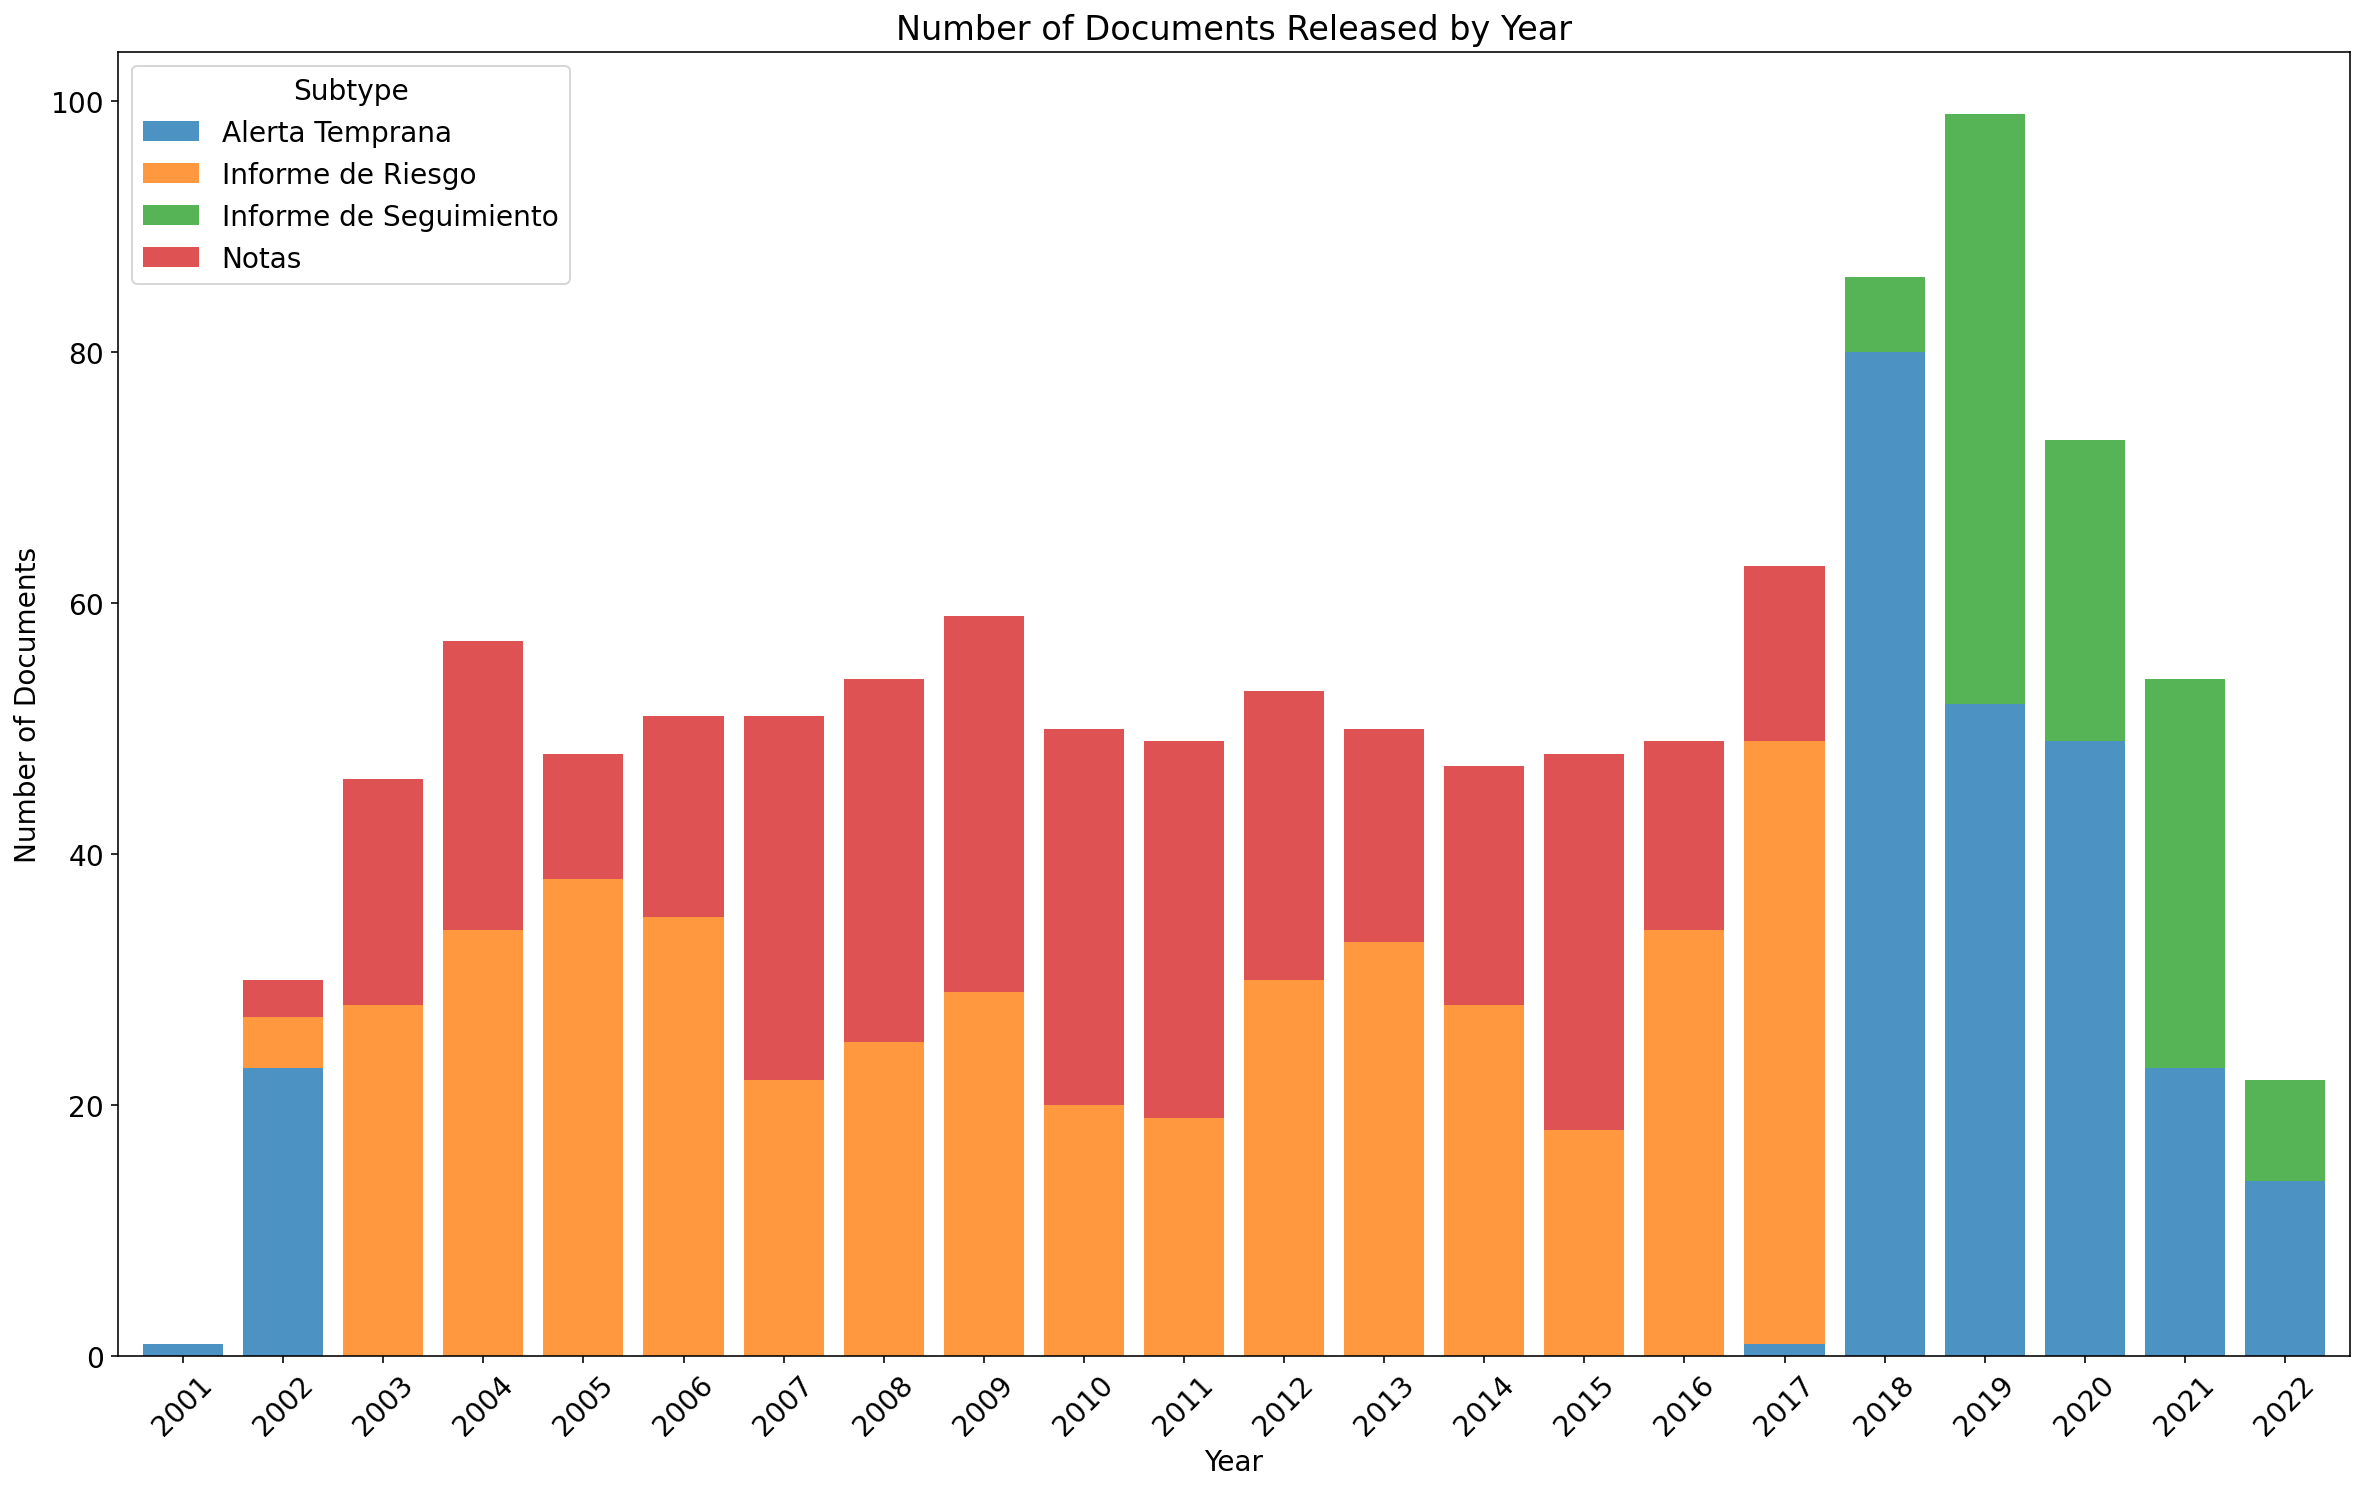

In [151]:
plt.figure()
plt.rcParams.update({'font.size': 14})

dfg.plot(kind="bar", figsize=(20, 12), stacked = True, width=0.8, alpha=0.8, rot=45)
plt.title("Number of Documents Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")

# 5. Top Years - Sort Descending

In [152]:
dfh = df.groupby(["Year"]).agg({"Filename":"count"}).sort_values("Filename", ascending = False)
dfh.columns = ["Number of documents"]
dfh

,Number of documents
Year,
2019,99
2018,86
2020,73
2017,63
2009,59
2004,57
2021,54
2008,54
2012,53


# 6. Statistical Distribution of Number of Documents per Year

In [153]:
dfh.describe()

,Number of documents
count,22.000000
mean,51.818182
std,19.658117
min,1.000000
25%,48.000000
50%,50.500000
75%,56.250000
max,99.000000


# 7. Statistical Distribution per Period

In [154]:
df1 = dfh[dfh.index < 2006]
df2 = dfh[(dfh.index > 2005) & (dfh.index < 2012)]
df3 = dfh[(dfh.index > 2011) & (dfh.index < 2017)]
df4 = dfh[dfh.index > 2016]

# 7.1 2001 - 2005 (Conflicto, 2005 Justicia y Paz)

In [155]:
df1

,Number of documents
Year,
2004,57
2005,48
2003,46
2002,30
2001,1


In [156]:
df1.describe()

,Number of documents
count,5.000000
mean,36.400000
std,22.052211
min,1.000000
25%,30.000000
50%,46.000000
75%,48.000000
max,57.000000


# 7.2 2006- 2011 (Conflicto)

In [157]:
df2

,Number of documents
Year,
2009,59
2008,54
2007,51
2006,51
2010,50
2011,49


In [158]:
df2.describe()

,Number of documents
count,6.000000
mean,52.333333
std,3.669696
min,49.000000
25%,50.250000
50%,51.000000
75%,53.250000
max,59.000000


# 7.3 2012 - 2016 (Negociaciones de Paz, Acuerdo de La Habana)

In [159]:
df3

,Number of documents
Year,
2012,53
2013,50
2016,49
2015,48
2014,47


In [160]:
df3.describe()

,Number of documents
count,5.000000
mean,49.400000
std,2.302173
min,47.000000
25%,48.000000
50%,49.000000
75%,50.000000
max,53.000000


# 7.4 2017 - 2022 (Post- Acuerdo)

In [161]:
df4

,Number of documents
Year,
2019,99
2018,86
2020,73
2017,63
2021,54
2022,22


In [162]:
df4.describe()

,Number of documents
count,6.000000
mean,66.166667
std,26.932632
min,22.000000
25%,56.250000
50%,68.000000
75%,82.750000
max,99.000000


# 7. Export HTML

In [163]:
!jupyter nbconvert --to html 11_Distribution_of_NNAJ_Docs_Time.ipynb

[NbConvertApp] Converting notebook 11_Distribution_of_NNAJ_Docs_Time.ipynb to html
[NbConvertApp] Writing 900078 bytes to 11_Distribution_of_NNAJ_Docs_Time.html
